In [1]:
import re
import time
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from bs4 import BeautifulSoup
from tqdm import tqdm
from datetime import datetime

거래량 이상치 찾아내기


In [4]:
stock2 = pd.read_csv('./stock2.csv')

In [158]:
b = b.T

In [164]:
for i in range(len(b)):
    x = b.iloc[i:i+1,:]
    mean_vol = remove_outter_vol(x)
    print(mean_vol)

sample      NaN
Volume_D9   NaN
Volume_D8   NaN
Volume_D7   NaN
Volume_D6   NaN
Volume_D5   NaN
Volume_D4   NaN
Volume_D3   NaN
Volume_D2   NaN
Volume_D1   NaN
dtype: float64
sample      NaN
Volume_D9   NaN
Volume_D8   NaN
Volume_D7   NaN
Volume_D6   NaN
Volume_D5   NaN
Volume_D4   NaN
Volume_D3   NaN
Volume_D2   NaN
Volume_D1   NaN
dtype: float64
sample      NaN
Volume_D9   NaN
Volume_D8   NaN
Volume_D7   NaN
Volume_D6   NaN
Volume_D5   NaN
Volume_D4   NaN
Volume_D3   NaN
Volume_D2   NaN
Volume_D1   NaN
dtype: float64
sample      NaN
Volume_D9   NaN
Volume_D8   NaN
Volume_D7   NaN
Volume_D6   NaN
Volume_D5   NaN
Volume_D4   NaN
Volume_D3   NaN
Volume_D2   NaN
Volume_D1   NaN
dtype: float64
sample      NaN
Volume_D9   NaN
Volume_D8   NaN
Volume_D7   NaN
Volume_D6   NaN
Volume_D5   NaN
Volume_D4   NaN
Volume_D3   NaN
Volume_D2   NaN
Volume_D1   NaN
dtype: float64
sample      NaN
Volume_D9   NaN
Volume_D8   NaN
Volume_D7   NaN
Volume_D6   NaN
Volume_D5   NaN
Volume_D4   NaN
Volume_D3   N

In [198]:
x = b.iloc[1:2,:]

In [199]:
br_vol = x.T

In [200]:
br_vol = br_vol.rename(columns = {br_vol.columns[0] : 'sample'})

In [201]:
br_vol = br_vol.reset_index()
br_vol = br_vol.drop(columns=['index'])

In [202]:
q3 = br_vol.quantile(0.75)
q1 = br_vol.quantile(0.25)

IQR = q3-q1
upper_limit = q3 + IQR

In [203]:
upper_limit

sample    10631362.75
dtype: float64

In [204]:
indexnum = br_vol.index[(br_vol['sample'] >= upper_limit[0])][-1]

IndexError: index -1 is out of bounds for axis 0 with size 0

In [207]:
br_vol.index[(br_vol['sample'] >= 10631362  5500002)]

Int64Index([], dtype='int64')

In [205]:
br_vol

,sample
0,38177
1,71671
2,97918
3,86861
4,4941970
5,9614355
6,1349265
7,1154676
8,8135306
9,5500002


In [178]:
br_vol = x.T
br_vol = br_vol.rename(columns = {br_vol.columns[0] : 'sample'})
br_vol = br_vol.reset_index()
br_vol = br_vol.drop(columns=['index'])

q3 = br_vol.quantile(0.75)
q1 = br_vol.quantile(0.25)

IQR = q3-q1
upper_limit = q3 + IQR

indexnum = br_vol.index[(br_vol['sample'] >= upper_limit[0])][-1]
mean_vol = br_vol.iloc[indexnum+1:,:].mean()

mean_vol

sample   NaN
dtype: float64

In [170]:
def remove_outter_vol(x):
    br_vol = x.T
    br_vol = br_vol.rename(columns = {br_vol.columns[0] : 'sample'})
    br_vol = br_vol.reset_index()
    br_vol = br_vol.drop(columns=['index'])
    
    q3 = br_vol.quantile(0.75)
    q1 = br_vol.quantile(0.25)

    IQR = q3-q1
    upper_limit = q3 + IQR
    indexnum = br_vol.index[(br_vol['sample'] >= upper_limit[0])][-1]
    mean_vol = br_vol.iloc[indexnum+1:,:].mean()
    
    return mean_vol

In [91]:
a = stock2.filter(items = ['stock_code'])
b = stock2.iloc[:,8:18]

In [126]:
br_vol = stock2.iloc[10:11,8:18]

In [136]:
indexnum = br_vol.index[(br_vol['sample'] >=upper_limit)][-1]
br_vol.iloc[indexnum+1:,:].mean()

ValueError: Can only compare identically-labeled Series objects

In [78]:
indexnum = br_vol.index[(br_vol['sample'] >=150000)][-1]
br_vol.iloc[indexnum+1:,:].mean()

sample    35778.571429
dtype: float64

In [133]:
br_vol

,sample
0,448367
1,153322
2,159928
3,41912
4,79494
5,39368
6,20059
7,16495
8,11058
9,42064


In [52]:
upper_limit[0]

244843.75

In [49]:
q3 = br_vol.quantile(0.75)
q1 = br_vol.quantile(0.25)

IQR = q3-q1
upper_limit = q3 + IQR

<AxesSubplot:>

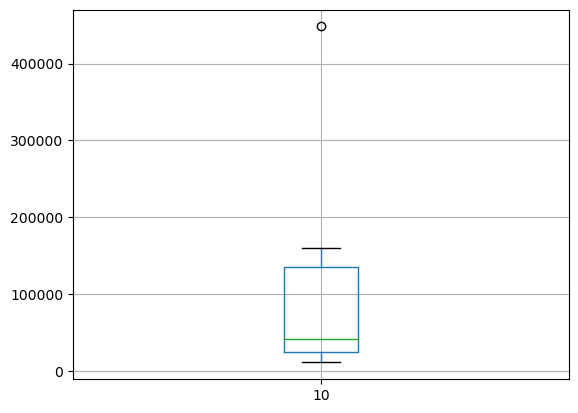

In [19]:
%matplotlib inline
br_vol.boxplot()